# Issue 594 - Prior Data does not appear in the inversion Result ERT

The full issue can be found on https://github.com/gimli-org/gimli/issues/594

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pygimli as pg
from pygimli.physics import ert
from pygimli.frameworks import PriorModelling, JointModelling
from pygimli.viewer.mpl import draw1DColumn

In [2]:

# Define a function to safely convert a string to a float, handling 'None' values
def safe_float(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return None

In [4]:


data1 = np.genfromtxt("X_1.txt", converters={2: safe_float})

# Assuming your data has three columns, unpack them into x, z, and r
x1, z1, r1 = data1[:, 0], data1[:, 1], data1[:, 2]
print(z1)
#%%


[733.5 733.3 733.1 732.9 732.7 732.5 732.3 732.1 731.9 731.7 731.5 731.3
 731.1 730.9 730.7 730.5 730.3 730.1 729.9 729.7 729.5 729.3 729.1 728.9
 728.7 728.5 728.3 728.1 727.9 727.7]


Data: Sensors: 70 data: 6035, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']


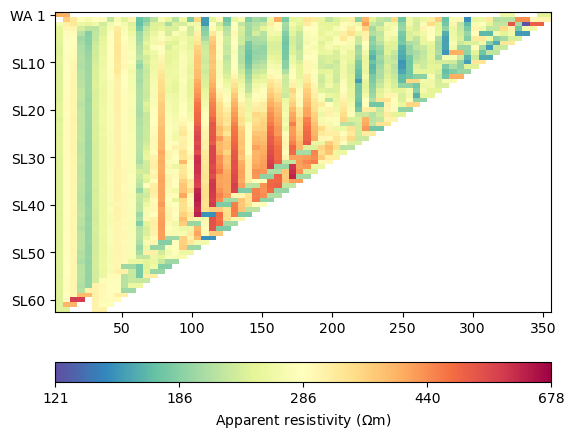

In [24]:

ERTdata = ert.load("E01.txt", verbose=True)
print(ERTdata)
ERTdata.remove(ERTdata["rhoa"] > 3000)
ERTdata.remove(ERTdata["rhoa"] < 120)
ax, cb = ert.show(ERTdata)


In [6]:

#%%

ERTdata["k"] = ert.geometricFactors(ERTdata)
ERTdata["err"] = ert.estimateError(ERTdata, relativeError=0.1, absoluteUError=5e-6)
mgr = ert.ERTManager(ERTdata, verbose=True)
mgr.invert(lam=100, verbose=True, paraDepth=70, paraMaxCellSize=100)


29/09/23 - 11:09:58 - pyGIMLi - INFO - Found 2 regions.
29/09/23 - 11:09:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
29/09/23 - 11:09:58 - pyGIMLi - INFO - Found 2 regions.
29/09/23 - 11:09:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
29/09/23 - 11:09:58 - pyGIMLi - INFO - Creating forward mesh from region infos.
29/09/23 - 11:09:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
29/09/23 - 11:09:58 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3718 Cells: 7084 Boundaries: 5488
29/09/23 - 11:09:58 - pyGIMLi - INFO - Use median(data values)=249.785
29/09/23 - 11:09:58 - pyGIMLi - INFO - Created startmodel from forward operator: 1305, min/max=249.785000/249.785000
29/09/23 - 11:09:58 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000017EAEBAEB80>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000017EAEBAEC70>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000017EAEBAEC20>
min/max (data): 84.87/3955
min/max (error): 10%/11.02%
min/max (start model): 250/250
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1.69 (dPhi = 96.42%) lam: 100
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.24 (dPhi = 21.39%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.13 (dPhi = 7.32%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.09 (dPhi = 1.21%) lam: 100.0
######################################################

1305 [96.78576336210611,...,165.92460812505274]

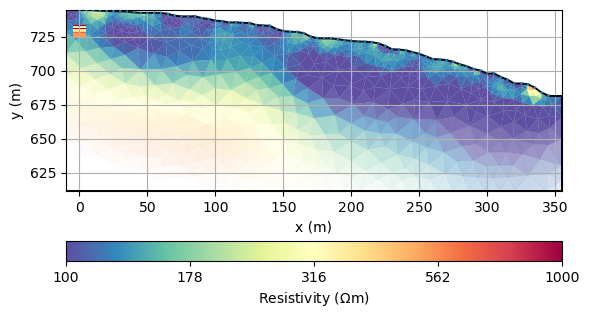

In [21]:

# kw = dict(cMin=10, cMax=1000, logScale=True, cMap="Spectral_r",
#           xlabel="x (m)", ylabel="y (m)")
kw = dict(logScale=True, cMap="Spectral_r", cMin=100, cMax=1000,
          xlabel="x (m)", ylabel="y (m)")
ax, cb = mgr.showResult(**kw)

zz1 = np.abs(z1)
iz1 = np.argsort(zz1)
thk1 = np.diff(zz1[iz1]) 
# thk1 = np.hstack([0.2, np.diff(zz1[iz1])])
draw1DColumn(ax, x=x1[0], val=r1[iz1], thk=thk1, ztopo=max(zz1), width=10, **kw)
ax.grid(True)

In [20]:
len(r1[iz1]), len(thk1)
zz1

array([733.5, 733.3, 733.1, 732.9, 732.7, 732.5, 732.3, 732.1, 731.9,
       731.7, 731.5, 731.3, 731.1, 730.9, 730.7, 730.5, 730.3, 730.1,
       729.9, 729.7, 729.5, 729.3, 729.1, 728.9, 728.7, 728.5, 728.3,
       728.1, 727.9, 727.7])